In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter


drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/CL_Cup IT 2020_DS_1 тур/CUP_IT_train_data.csv',  comment='#', parse_dates=['dlk_cob_date'])
test_data = pd.read_csv('/content/drive/My Drive/CL_Cup IT 2020_DS_1 тур/CUP_IT_test_data.csv',  comment='#', parse_dates=['dlk_cob_date'])

In [5]:
num_train_clients = len(set(train_data.cif_id))
num_test_clients = len(set(test_data.cif_id))

print('Кол-во клиентов в трейне:', num_train_clients)
print('Кол-во клиентов в тесте:', num_test_clients)

print('Кол-во пересечений клиентов из трейна и теста:', len(set(train_data.cif_id) - set(train_data.cif_id)))

Кол-во клиентов в трейне: 396576
Кол-во клиентов в тесте: 113962
Кол-во пересечений клиентов из трейна и теста: 0




---


Распарсим колонку даты 'dlk_cob_date' на две колонки: год, месяц. Колонки дня не будет, потому что все данные фиксируются в конце месяца, т.е. все дни в дате - 30, 31.
Год оставим, хоть он и 2018 везде, потому что это, наверное, будет играть роль при масштабируемости, когда на инференсе он захотят прогнать данные из 2019 и 2018 года, например


---



In [0]:
train_data['year'] = train_data.dlk_cob_date.dt.year
train_data['month'] = train_data.dlk_cob_date.dt.month

test_data['year'] = test_data.dlk_cob_date.dt.year
test_data['month'] = test_data.dlk_cob_date.dt.month

train_data.drop(['dlk_cob_date'], axis=1, inplace=True)
test_data.drop(['dlk_cob_date'], axis=1, inplace=True)



---

#ФИЧА 'big_city' - Город клиента (укрупненный до вариантов Мск/Спб., миллионник, другой город)

---



In [0]:
print('Клиенты с городом nan:', 'присутствуют' if sum(pd.isna(train_data.big_city)) != 0 else 'отсутствуют')

Клиенты с городом nan: отсутствуют


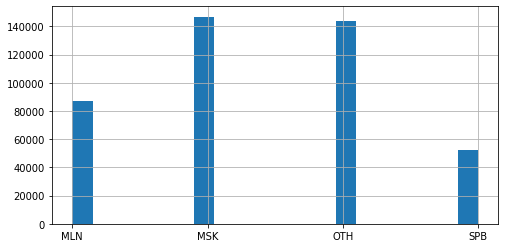

In [0]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 1, 1)
plt.grid(True)
plt.hist(train_data.groupby(['big_city', 'cif_id']).count().reset_index('cif_id').index, 20);



---

#ФИЧА 'cu_gender' - Пол клиента

---



In [0]:
print('Клиенты с полом nan:', 'присутствуют' if sum(pd.isna(train_data.cu_gender)) != 0 else 'отсутствуют')

Клиенты с полом nan: отсутствуют


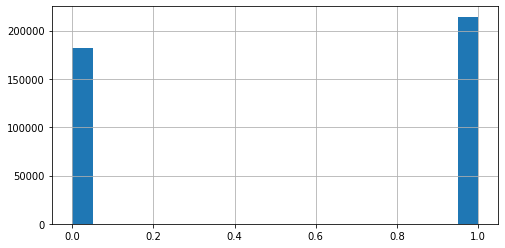

In [0]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 1, 1)
plt.grid(True)
plt.hist(train_data.groupby(['cu_gender', 'cif_id']).count().reset_index('cif_id').index, 20);
#Ну, кого-то чуть-чуть больше



---

#ФИЧА 'cu_education_level' - Уровень образования клиента

---



In [0]:
print('Клиенты с образованием nan:', 'присутствуют' if sum(pd.isna(train_data.cu_education_level)) != 0 else 'отсутствуют')

Клиенты с образованием nan: присутствуют


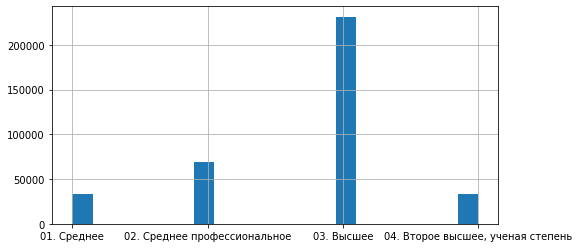

In [0]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 1, 1)
plt.grid(True)
plt.hist(train_data.groupby(['cu_education_level', 'cif_id']).count().reset_index('cif_id').index, 20);
#Ну, кого-то чуть-чуть больше



---

#ФИЧА 'cu_empl_area' - Область работы клиента

---



In [0]:
print('Кол-во областей работы:', len(set(train_data.cu_empl_area)))
print('Клиенты с областью работы nan:', 'присутствуют' if sum(pd.isna(train_data.cu_empl_area)) != 0 else 'отсутствуют')

Кол-во областей работы: 135
Клиенты с областью работы nan: присутствуют


In [0]:
c = Counter()

for area in list(train_data.groupby(['cu_empl_area', 'cif_id']).count().reset_index('cif_id').index):
  c[area] += 1

In [0]:
count = 0
for key in c.keys():
  if c[key] > 1:
    count += 1
    print(key, c[key])

print('-'*10)
print('Кол-во областей работы, которые указывались больше одного раза:', count)
print('Напомню, всего областей работы - 135')

PR, МАРКЕТИНГ, СМИ 3
PR, маркетинг, СМИ 4742
Государственная служба 11288
ДРУГОЕ 82202
ЗДРАВООХРАНЕНИЕ 12919
ИНФОРМАЦИОННЫЕ ТЕХНОЛОГИИ 15288
НАУКА, ОБРАЗОВАНИЕ 3
Наука, образование 8791
ПРОИЗВОДСТВО, ДОБЫВАЮЩАЯ ПРОМЫШЛЕННОСТЬ 66624
Подбор персонала 28
СТРАХОВАНИЕ 2154
СТРОИТЕЛЬСТВО, НЕДВИЖИМОСТЬ 9
Системы безопасности 2
Строительство, недвижимость 19934
ТОРГОВЛЯ 84119
ТРАНСПОРТ, ЛОГИСТИКА 21609
ТУРИЗМ, РАЗВЛЕЧЕНИЯ, РЕСТОРАННЫЙ БИЗНЕС 11
Туризм, развлечения, ресторанный бизнес 2822
ФИНАНСЫ, УПРАВЛЯЮЩИЕ КОМПАНИИ, БАНКИ 3
Финансы, управляющие компании, банки 11663
ЮРИДИЧЕСКИЕ УСЛУГИ 2110
деревообработка 2
----------
Кол-во областей работы, которые указывались больше одного раза: 22
Напомню, всего областей работы - 135




---

#ФИЧА 'cu_empl_level' - Уровень должности клиента

---



In [0]:
print('Кол-во уровней должности работы:', len(set(train_data.cu_empl_level)))
print('Клиенты с уровнем должности nan:', 'присутствуют' if sum(pd.isna(train_data.cu_empl_level)) != 0 else 'отсутствуют')

Кол-во уровней должности работы: 30
Клиенты с уровнем должности nan: присутствуют


In [0]:
c = Counter()

for area in list(train_data.groupby(['cu_empl_level', 'cif_id']).count().reset_index('cif_id').index):
  c[area] += 1

In [0]:
count = 0
for key in c.keys():
  if c[key] > 1:
    count += 1
    print(key, c[key])

print('-'*10)
print('Кол-во уровней должности, которые указывались больше одного раза:', count)
print('Напомню, всего уровней должности - 30')

- 2
01 7568
02 9795
03 49349
04 16
05 8
06 104
BLUE COLLAR STAFF 36700
INSURANCE AGENT 146
MIDDLE MANAGEMENT 56464
OTHER 174
Other 714
QUALIFIED STAFF 111198
SALES MANAGER 7655
SELF-EMPLOYED 711
SENIOR MANAGEMENT 17166
SUPPORT STAFF 50111
Self-employed 3997
TRADE REPRESENTATIVE 7300
----------
Кол-во уровней должности, которые указывались больше одного раза: 19
Напомню, всего уровней должности - 30




---

#ФИЧИ ФЛАГИ 'payroll_f, ca_f, standalone_dc_f, standalone_payroll_dc_f, standalone_nonpayroll_dc_f, is_married, active' - Флаг того, что клиент получает з/п на карту банка; Флаг наличия текущего счета; Флаг отдельной дебетовой карты; Флаг отдельной зарплатной карты; Флаг отдельной НЕ зарплатной карты;  Флаг Состоит ли клиент в браке; Флаг является ли клиент активным по определению банка


---


In [13]:
for flag, desc in zip(['payroll_f', 'ca_f', 'standalone_dc_f', 'standalone_payroll_dc_f', 'standalone_nonpayroll_dc_f', 'is_married', 'active'],
          for flag, desc in zip(['payroll_f', 'ca_f', 'standalone_dc_f', 'standalone_payroll_dc_f', 'standalone_nonpayroll_dc_f', 'is_married', 'active'],
                      ['клиент получает з/п на карту банка', 'наличия текущего счета', 'отдельной дебетовой карты' , 'отдельной зарплатной карты', 'отдельной НЕ зарплатной карты', 'состоит ли клиент в браке', 'является ли клиент активным по определению банка']):            ['клиент получает з/п на карту банка', 'наличия текущего счета', 'отдельной дебетовой карты' , 'отдельной зарплатной карты', 'отдельной НЕ зарплатной карты', 'состоит ли клиент в браке', 'является ли клиент активным по определению банка']):
  
  print('Флаги ' + desc + ' nan:', 'присутствуют' if sum(pd.isna(train_data[flag])) != 0 else 'отсутствуют')
  print('-'*10)

Флаги клиент получает з/п на карту банка nan: отсутствуют
----------
Флаги наличия текущего счета nan: отсутствуют
----------
Флаги отдельной дебетовой карты nan: отсутствуют
----------
Флаги отдельной зарплатной карты nan: отсутствуют
----------
Флаги отдельной НЕ зарплатной карты nan: отсутствуют
----------
Флаги состоит ли клиент в браке nan: отсутствуют
----------
Флаги является ли клиент активным по определению банка nan: отсутствуют
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


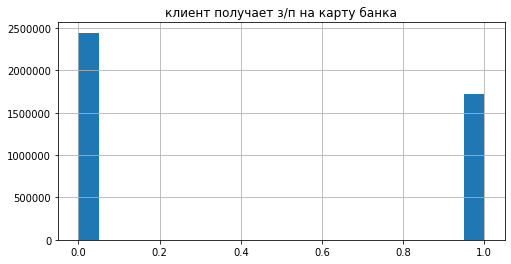

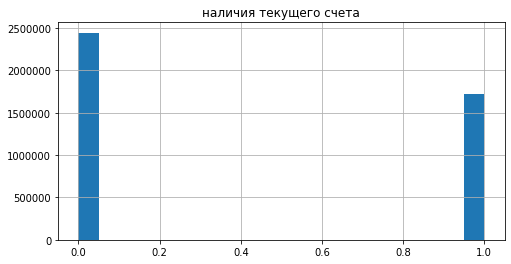

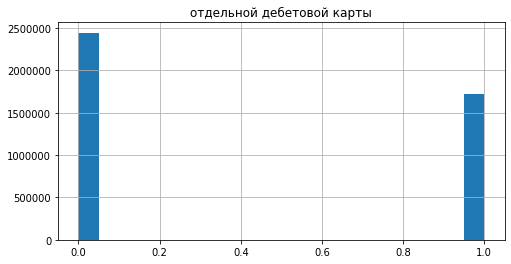

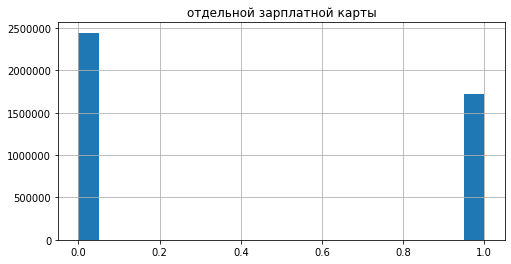

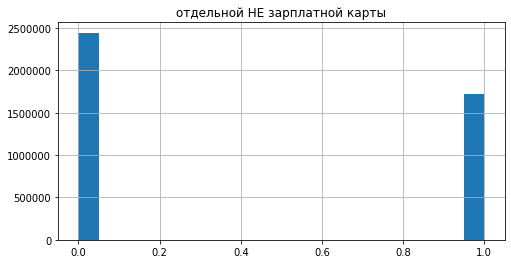

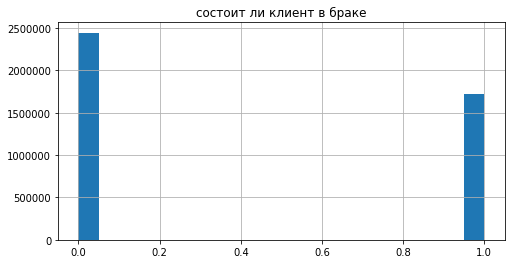

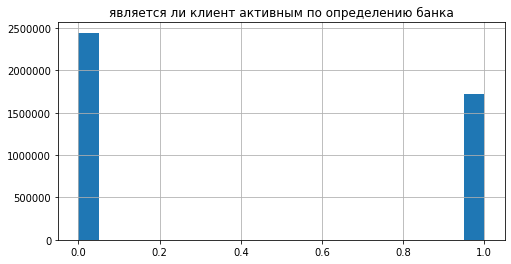

In [14]:
for flag, desc in zip(['payroll_f', 'ca_f', 'standalone_dc_f', 'standalone_payroll_dc_f', 'standalone_nonpayroll_dc_f', 'is_married', 'active'],
                      ['клиент получает з/п на карту банка', 'наличия текущего счета', 'отдельной дебетовой карты' , 'отдельной зарплатной карты', 'отдельной НЕ зарплатной карты', 'состоит ли клиент в браке', 'является ли клиент активным по определению банка']):
  plt.figure(figsize=[8, 4])
  plt.grid(True)
  plt.subplot(1, 1, 1)
  plt.title(desc)
  plt.hist(train_data[balance], 20);




---

#ФИЧИ 'cur_quantity_pl, cur_quantity_mort, cur_quantity_cc, cur_quantity_deposits, cur_quantity_dc, cur_quantity_accounts, cur_quantity_saccounts, cur_quantity_mf' - Количество персональных кредитов, ипотечных кредитов, кредитных карт, депозитов, дебетовых карт, счетов, накопительных счетов, инвестиционных продуктов

---



In [19]:
for balance, desc in zip(['cur_quantity_pl', 'cur_quantity_mort', 'cur_quantity_cc', 'cur_quantity_deposits', 'cur_quantity_dc', 'cur_quantity_accounts', 'cur_quantity_saccounts', 'cur_quantity_mf'],
                   ['персональных кредитов', 'ипотечных кредитов', 'кредитных карт', 'депозитов', 'дебетовых карт', 'счетов', 'накопительных счетов', 'инвестиционных продуктов']):
  
  print('Какое кол-во ' + desc + ' брали клиенты за один месяц:', set(train_data[balance]))
  print('Клиенты с кол-вом ' + desc + ' nan:', 'присутствуют' if sum(pd.isna(train_data[balance])) != 0 else 'отсутствуют')
  print('-'*10)

Какое кол-во персональных кредитов брали клиенты за один месяц: {0, 1, 2, 3, 4, 5, 6}
Клиенты с кол-вом персональных кредитов nan: отсутствуют
----------
Какое кол-во ипотечных кредитов брали клиенты за один месяц: {0, 1, 2, 3}
Клиенты с кол-вом ипотечных кредитов nan: отсутствуют
----------
Какое кол-во кредитных карт брали клиенты за один месяц: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Клиенты с кол-вом кредитных карт nan: отсутствуют
----------
Какое кол-во депозитов брали клиенты за один месяц: {0, 1, 2, 3, 4, 5}
Клиенты с кол-вом депозитов nan: отсутствуют
----------
Какое кол-во дебетовых карт брали клиенты за один месяц: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10}
Клиенты с кол-вом дебетовых карт nan: отсутствуют
----------
Какое кол-во счетов брали клиенты за один месяц: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Клиенты с кол-вом счетов nan: отсутствуют
----------
Какое кол-во накопительных счетов брали клиенты за один месяц: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 19, 20, 22, 24, 25

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


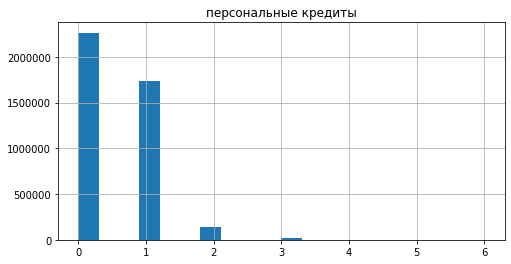

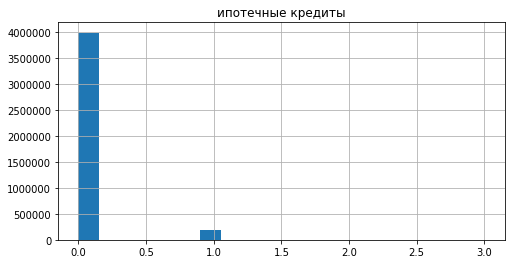

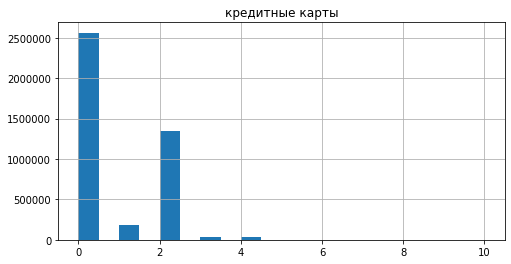

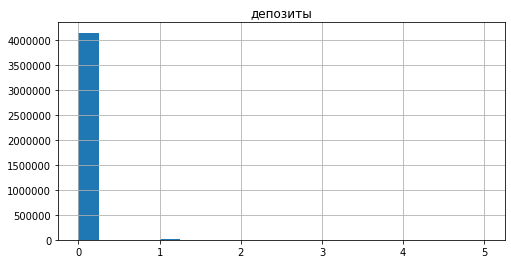

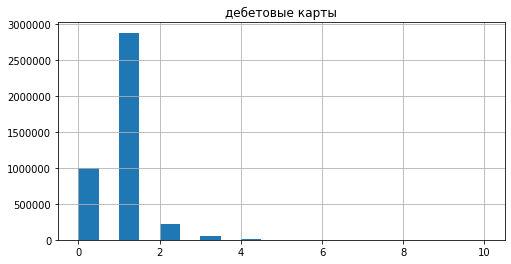

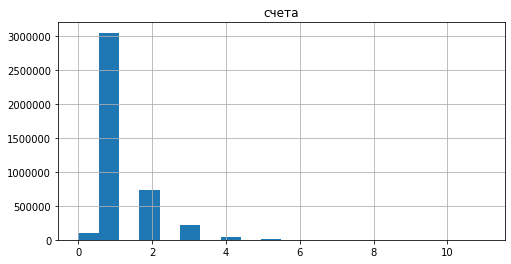

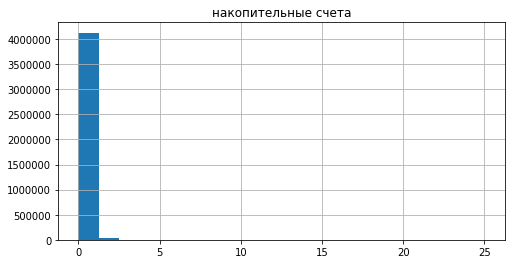

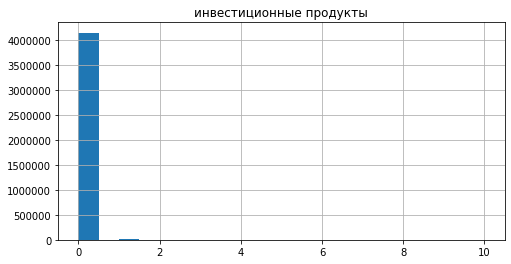

In [25]:
for balance, desc in zip(['cur_quantity_pl', 'cur_quantity_mort', 'cur_quantity_cc', 'cur_quantity_deposits', 'cur_quantity_dc', 'cur_quantity_accounts', 'cur_quantity_saccounts', 'cur_quantity_mf'],
                         ['персональные кредиты', 'ипотечные кредиты', 'кредитные карты', 'депозиты', 'дебетовые карты', 'счета', 'накопительные счета', 'инвестиционные продукты']): 
  plt.figure(figsize=[8, 4])
  plt.grid(True)
  plt.subplot(1, 1, 1)
  plt.title(desc)
  plt.hist(train_data[balance], 20);



---

#ФИЧИ 'cc_balance, cl_balance, ml_balance, pl_balance, td_volume, ca_volume, sa_volume, mf_volume' - Баланс кредитных карт, автокредитов, ипотеки, кредитов, депозитов, счетов, накопительных счетов, инвестиций

---



In [18]:
for balance, desc in zip(['cc_balance', 'cl_balance', 'ml_balance', 'pl_balance', 'td_volume', 'ca_volume', 'sa_volume', 'mf_volume'],
                   ['кредитных карт', 'автокредитов', 'ипотеки', 'кредитов', 'депозитов', 'счетов', 'накопительных счетов', 'инвестиций']):
  
  print('Кол-во строчек с балансом ' + desc + ' nan:',  sum(pd.isna(train_data[balance])))
  print('Кол-во строчек с балансом ' + desc + ' не равным nan:', sum(pd.isna(train_data[balance]).apply(lambda x: True if x == False else False)))
  print('-'*10)

Кол-во строчек с балансом кредитных карт nan: 2562851
Кол-во строчек с балансом кредитных карт не равным nan: 1598932
----------
Кол-во строчек с балансом автокредитов nan: 4078513
Кол-во строчек с балансом автокредитов не равным nan: 83270
----------
Кол-во строчек с балансом ипотеки nan: 3982043
Кол-во строчек с балансом ипотеки не равным nan: 179740
----------
Кол-во строчек с балансом кредитов nan: 2262883
Кол-во строчек с балансом кредитов не равным nan: 1898900
----------
Кол-во строчек с балансом депозитов nan: 4146870
Кол-во строчек с балансом депозитов не равным nan: 14913
----------
Кол-во строчек с балансом счетов nan: 105280
Кол-во строчек с балансом счетов не равным nan: 4056503
----------
Кол-во строчек с балансом накопительных счетов nan: 3864303
Кол-во строчек с балансом накопительных счетов не равным nan: 297480
----------
Кол-во строчек с балансом инвестиций nan: 4150408
Кол-во строчек с балансом инвестиций не равным nan: 11375
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


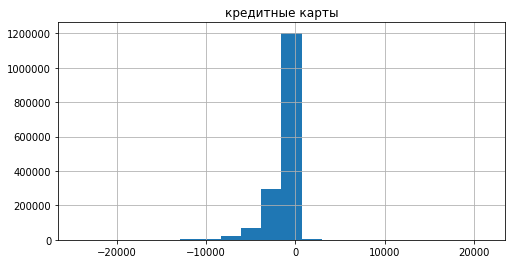

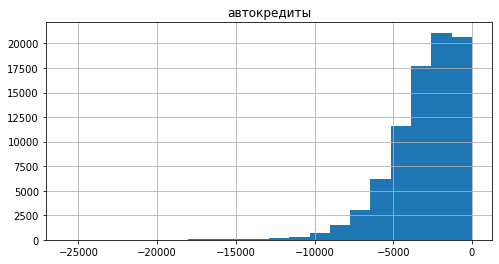

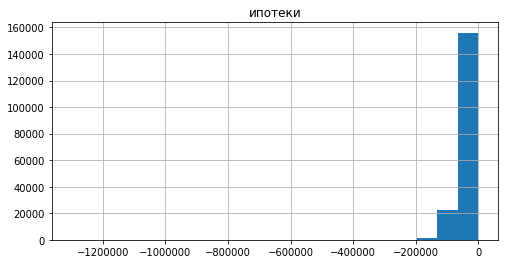

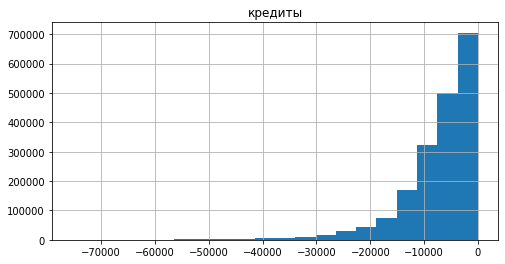

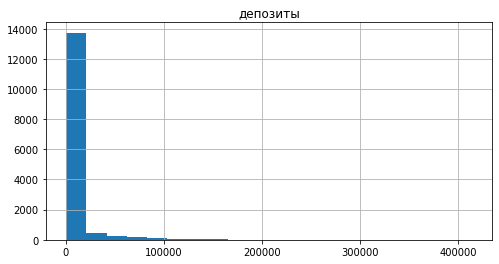

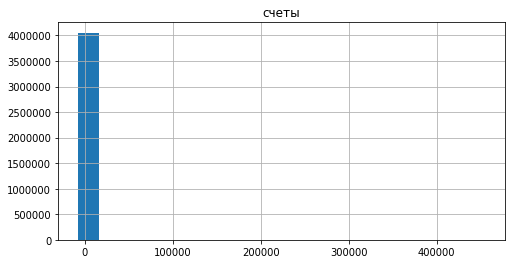

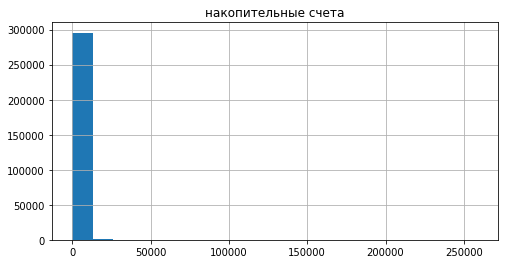

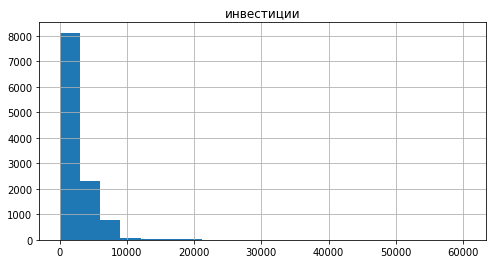

In [27]:
for balance, desc in zip(['cc_balance', 'cl_balance', 'ml_balance', 'pl_balance', 'td_volume', 'ca_volume', 'sa_volume', 'mf_volume'],
                   ['кредитные карты', 'автокредиты', 'ипотеки', 'кредиты', 'депозиты', 'счеты', 'накопительные счета', 'инвестиции']):
  plt.figure(figsize=[8, 4])
  plt.grid(True)
  plt.subplot(1, 1, 1)
  plt.title(desc)
  plt.hist(train_data[balance], 20);



---

#ДАЛЕЕ...

---

